In [21]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.


**Booking_ID**: unique identifier of each booking

**no_of_adults**: Number of adults

**no_of_children**: Number of Children

**no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan**: Type of meal plan booked by the customer:

**required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time**: Number of days between the date of booking and the arrival date

**arrival_year**: Year of arrival date

**arrival_month**: Month of arrival date

**arrival_date**: Date of the month

**market_segment_type**: Market segment designation.

**repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

### Data Understanding

In [2]:
# read csv file from data/Hotel Reservations.csv and show size and first 10 rows
df = pd.read_csv('data/Hotel Reservations.csv', sep = ',')
print(f'size of df: {df.shape}')
df.head(10)

size of df: (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [3]:
# checking df info and for null data if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
# changing the target feature to binary 1|0
# 1 = not cancelled and 0 = cancelled
df.loc[(df['booking_status'] == 'Not_Canceled'), 'booking_status'] = 0
df.loc[(df['booking_status'] == 'Canceled'), 'booking_status'] = 1
df['booking_status'] = df['booking_status'].astype('Int32')

### Feature Engineering

In [5]:
df['type_of_meal_plan'] = np.where(df.type_of_meal_plan == 'Not Selected', 0, 
                                   df.type_of_meal_plan.str.split(" ", expand = True)[2])
df['room_type_reserved'] = np.where(df.room_type_reserved == ' ', 0,
                                    df.room_type_reserved.str.split(" ", expand = True)[1])

In [6]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [7]:
df['people'] = df['no_of_children'] + df['no_of_adults']

In [8]:
# encoding categorical features with OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first', dtype = 'int')

ohe_new = ohe.fit_transform(df[['market_segment_type']])
df_new = pd.DataFrame(ohe_new, columns=ohe.get_feature_names_out())
df = pd.concat([df, df_new], axis=1)
df

C:\Users\FLEX\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,people,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,1,0,1,224,2017,...,0,0,65.00,0,0,2,0,0,1,0
1,INN00002,2,0,2,3,0,0,1,5,2018,...,0,0,106.68,1,0,2,0,0,0,1
2,INN00003,1,0,2,1,1,0,1,1,2018,...,0,0,60.00,0,1,1,0,0,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,...,0,0,100.00,0,1,2,0,0,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,...,0,0,94.50,0,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,0,4,85,2018,...,0,0,167.80,1,0,3,0,0,0,1
36271,INN36272,2,0,1,3,1,0,1,228,2018,...,0,0,90.95,2,1,2,0,0,0,1
36272,INN36273,2,0,2,6,1,0,1,148,2018,...,0,0,98.39,2,0,2,0,0,0,1
36273,INN36274,2,0,0,3,0,0,1,63,2018,...,0,0,94.50,0,1,2,0,0,0,1


In [9]:
# dropping unnecessary columns
df.drop(['Booking_ID', 'market_segment_type'], axis = 1, inplace = True)

In [10]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'people',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [11]:
# reindexing columns so that booking status is at last 
new_cols = ['no_of_adults', 'no_of_children', 'people', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 
       'arrival_date', 'arrival_month', 'arrival_year', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status']
df=df.reindex(columns=new_cols)
df

,no_of_adults,no_of_children,people,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,repeated_guest,...,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,arrival_year,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,1,2,1,0,1,224,0,...,65.00,0,2,10,2017,0,0,1,0,0
1,2,0,2,2,3,0,0,1,5,0,...,106.68,1,6,11,2018,0,0,0,1,0
2,1,0,1,2,1,1,0,1,1,0,...,60.00,0,28,2,2018,0,0,0,1,1
3,2,0,2,0,2,1,0,1,211,0,...,100.00,0,20,5,2018,0,0,0,1,1
4,2,0,2,1,1,0,0,1,48,0,...,94.50,0,11,4,2018,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,3,2,6,1,0,4,85,0,...,167.80,1,3,8,2018,0,0,0,1,0
36271,2,0,2,1,3,1,0,1,228,0,...,90.95,2,17,10,2018,0,0,0,1,1
36272,2,0,2,2,6,1,0,1,148,0,...,98.39,2,1,7,2018,0,0,0,1,0
36273,2,0,2,0,3,0,0,1,63,0,...,94.50,0,21,4,2018,0,0,0,1,1


### EDA

In [12]:
pd.crosstab(df.arrival_month, df.booking_status)

booking_status,0,1
arrival_month,,
1,990,24
2,1274,430
3,1658,700
4,1741,995
5,1650,948
6,1912,1291
7,1606,1314
8,2325,1488
9,3073,1538


<AxesSubplot:xlabel='arrival_month'>

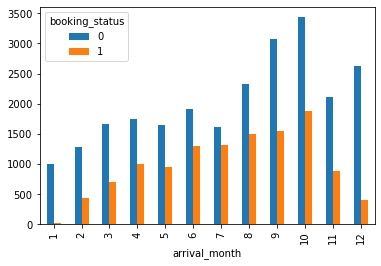

In [13]:
pd.crosstab(df.arrival_month, df.booking_status).plot.bar()

In [14]:
pd.crosstab(df.room_type_reserved, df.booking_status)

booking_status,0,1
room_type_reserved,,
1,19058,9072
2,464,228
3,5,2
4,3988,2069
5,193,72
6,560,406
7,122,36


<AxesSubplot:xlabel='room_type_reserved'>

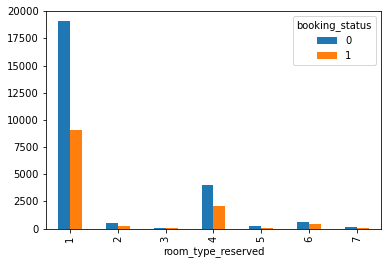

In [15]:
pd.crosstab(df.room_type_reserved, df.booking_status).plot.bar()

In [16]:
pd.crosstab(df.people, df.booking_status)

booking_status,0,1
people,,
1,5743,1809
2,15662,8280
3,2459,1392
4,514,398
5,10,5
10,1,0
11,0,1
12,1,0


<AxesSubplot:xlabel='people'>

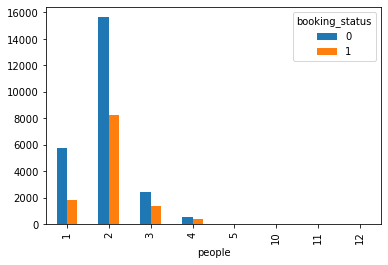

In [17]:
pd.crosstab(df.people, df.booking_status).plot.bar()

C:\Users\FLEX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_price_per_room', ylabel='booking_status'>

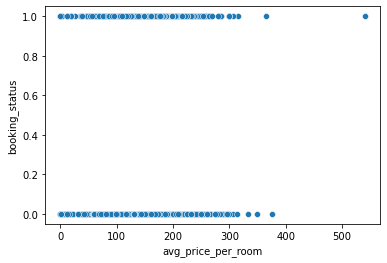

In [18]:
sns.scatterplot(df.avg_price_per_room, df.booking_status)

### Modelling

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   people                                36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_